In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [8]:
df1 = pd.read_csv('fashion-mnist_train.csv')
df2=pd.read_csv('fashion-mnist_test.csv')

In [9]:
X = df1.iloc[:, 1:].values.astype(float) / 255.0
y = df1.iloc[:, 0].values.reshape(-1, 1)

# Splitting the data into training and dev sets
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=10000, random_state=42)
X_train=X_train.T
X_dev=X_dev.T

In [10]:

X_test = df2.iloc[0:, 1:].values.T
X_test = X_test.astype(float) / 255.0
y_test = df2.iloc[0:, 0].values.reshape(-1, 1)

In [11]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size,activation):
        self.activationfunc=activation
        # For Hidden Neurons
        self.w1 = np.random.randn(hidden_size, input_size)*0.01
        self.b1 = np.zeros((hidden_size, 1))

        # For Output Neurons
        self.w2 = np.random.randn(output_size, hidden_size)*0.01
        self.b2 = np.zeros((output_size, 1))


    def one_hot(self,Y):
        
        one_hot_Y = np.eye(10)[Y.flatten()]
        one_hot_Y=one_hot_Y.T
        return one_hot_Y


    def activation(self,x,alpha=00.1): #tanh
        # return np.tanh(x)
        if(self.activationfunc=="relu"):
            return np.maximum(0, x)
        if(self.activationfunc=="leakyrelu"):
            return np.maximum(alpha * x, x)
    
    def activation_deriv(self,x,alpha=00.1):
        # tanh_x = self.activation(x)
        # return 1 - tanh_x**2
        if(self.activationfunc=="relu"):
            return x>0
        
        if(self.activationfunc=="leakyrelu"):
            dx = np.ones_like(x)
            dx[x < 0] = alpha
            return dx
        
        

    def softmax(self, x):
        ex = np.exp(x)  
        return ex / np.sum(ex, axis=0)
        
    
    def forward(self, X):
        # Forward pass
        self.z1 = np.dot(self.w1, X) + self.b1 #Z corresponds to pre activation value
        self.a1 = self.activation(self.z1) #a corresponds to activation value

        self.z2 = np.dot(self.w2,self.a1 ) + self.b2 #Z corresponds to pre activation value

        self.a2 = self.softmax(self.z2)#a corresponds to activation value
        return self.a2

    def compute_loss(self, y, y_pred):
        m = y.shape[1]
        cost = -(1/m)*np.sum(y*np.log(y_pred))
        return cost

    def backward(self, X, y_true, learning_rate):

        m = X.shape[1]
        self.a2
        self.dz2 = (self.a2-y_true) #derivative of soft max 
        self.dw2 = (1/m)*np.dot(self.dz2,self.a1.T )
        self.db2 = (1/m)*np.sum(self.dz2,axis=1,keepdims=True)


        self.dz1 = (1/m) * np.dot(self.w2.T, self.dz2) * self.activation_deriv(self.z1) #derivative of activation
        self.dw1 = (1/m)*np.dot(self.dz1,X.T )
        self.db1 = (1/m)*np.sum(self.dz1,axis=1,keepdims=True)

        self.w2 = self.w2 - learning_rate*self.dw2
        self.b2 = self.b2 - learning_rate*self.db2
        

        self.w1 = self.w1 - learning_rate*self.dw1
        self.b1 = self.b1 - learning_rate*self.db1


 
    def train(self, X, y, epochs, learning_rate):
        y=self.one_hot(y)
        loss_list=[]
        for epoch in range(epochs):
            predictions = self.forward(X)
            loss = self.compute_loss(y, predictions)
            self.backward(X, y, learning_rate)
            loss_list.append(loss)
            if(epoch%10==0):
                print(f"Epoch {epoch}, Loss: {loss}")
        plt.plot(range(1, len(loss_list) + 1), loss_list, marker='X')
        plt.xlabel('Epoch')
        plt.ylabel('Cost')
        plt.title('Cost vs Epoch')
        plt.show()

    def predict(self, X):
        return self.forward(X)

Epoch 0, Loss: 2.2990499868831225
Epoch 10, Loss: 1.864833504311895
Epoch 20, Loss: 1.591423098037641
Epoch 30, Loss: 1.4081490378130874
Epoch 40, Loss: 1.2796155219735985
Epoch 50, Loss: 1.185406052222763
Epoch 60, Loss: 1.1136740080154857
Epoch 70, Loss: 1.0572986468071217
Epoch 80, Loss: 1.0118162588432187
Epoch 90, Loss: 0.9743132747195281


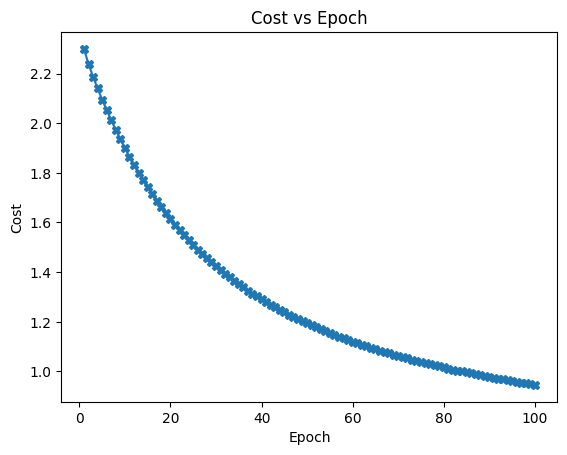

Epoch 0, Loss: 2.301722136815932
Epoch 10, Loss: 1.8209555051146722
Epoch 20, Loss: 1.5400502347617824
Epoch 30, Loss: 1.3599176798431332
Epoch 40, Loss: 1.2363395724209298
Epoch 50, Loss: 1.1466595263765536
Epoch 60, Loss: 1.0786380442830912
Epoch 70, Loss: 1.0252187280074536
Epoch 80, Loss: 0.9820855419002122
Epoch 90, Loss: 0.9464624711983489


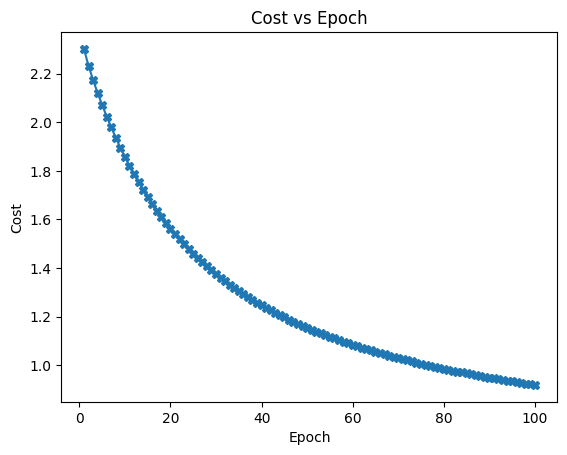

In [12]:
input_size = X_train.shape[0]
hidden_size = 750
output_size = 10
activation1="relu"
activation2="leakyrelu"

nnr = NeuralNetwork(input_size, hidden_size, output_size,activation1)
nnr.train(X_train, y_train, epochs=100,learning_rate=0.9)

nnlr = NeuralNetwork(input_size, hidden_size, output_size,activation2)
nnlr.train(X_train, y_train, epochs=100,learning_rate=0.9)

In [13]:
test_predictions = nnr.forward(X_dev)

# Convert one-hot encoded predictions back to class labels
predicted_labels = np.argmax(test_predictions, axis=0)

# Calculate accuracy
correct_predictions = np.sum(predicted_labels.reshape(-1, 1) == y_dev)
accuracy = correct_predictions / len(predicted_labels.reshape(-1, 1))
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 73.98%


In [14]:
test_predictions = nnlr.forward(X_dev)

# Convert one-hot encoded predictions back to class labels
predicted_labels = np.argmax(test_predictions, axis=0)

# Calculate accuracy
correct_predictions = np.sum(predicted_labels.reshape(-1, 1) == y_dev)
accuracy = correct_predictions / len(predicted_labels.reshape(-1, 1))
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 74.51%


In [21]:
test_predictions = nnlr.forward(X_test)
predicted_labels = np.argmax(test_predictions, axis=0)
predicted_labels=predicted_labels.reshape(-1, 1)


unique_labels = sorted(set(y_test + predicted_labels))
cm = confusion_matrix(y_test, predicted_labels, labels=unique_labels)
print(cm)

classification_rep = classification_report(y_test,predicted_labels,zero_division=1)
print(classification_rep)


TypeError: unhashable type: 'numpy.ndarray'